In [4]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans


In [5]:
df = pd.read_csv('C:\\Users\\victo\\OneDrive\\Documents\\mall_Customers.csv')

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Genre                   200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [8]:
df.head()#the first five rows of the data row

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [9]:
df.shape

(200, 5)

In [15]:
#choosing the annual income and the spending score
X = df.iloc[:,[3,4]]

In [16]:
X

,Annual Income (k$),Spending Score (1-100)
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40
...,...,...
195,120,79
196,126,28
197,126,74
198,137,18


# Choosing the number of clusters  using WCSS

In [42]:
#finding the value for different numbers of clusters
wcss =[]
for i in range(1,11): #that is values between 1-10
    kmeans= KMeans(n_clusters=i,random_state=42,init='k-means++')
    kmeans.fit(X)
    vic= wcss.append(kmeans.inertia) #kmeans.inertia is the same as wcss


C:\Users\victo\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\victo\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\victo\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\victo\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environme

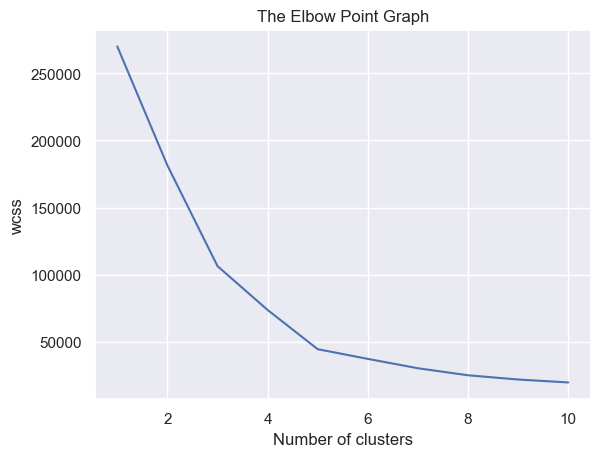

In [36]:
sns.set()
plt.plot(range(1,11),wcss)
plt.title('The Elbow Point Graph')
plt.xlabel('Number of clusters')
plt.ylabel('wcss')
plt.show()

In [50]:
#from the plot,we see that the optical numbers of clusters =5,that is the point where WCSS start
#to decrease more slowly(elbow points)
kmeans =KMeans(n_clusters=5)

In [51]:
kmeans.fit(X)

C:\Users\victo\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\victo\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


KMeans(n_clusters=5)

###### 
y= kmeans.predict(X)
y


Text(0, 0.5, 'Spending income')

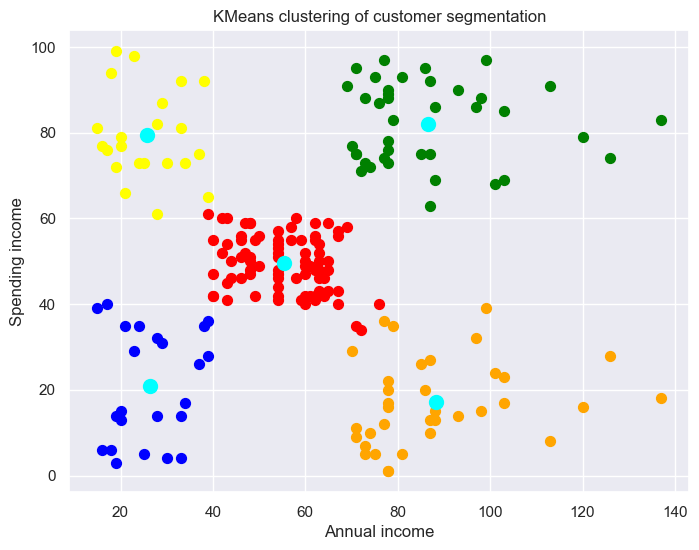

In [74]:
#plotting all their clusters and their centroid
plt.figure(figsize=(8,6))
plt.scatter(X.loc[y==0,'Annual Income (k$)'], X.loc[y==0,'Spending Score (1-100)'], s=50, c='green',label='Cluster1' )
plt.scatter(X.loc[y==1,'Annual Income (k$)'], X.loc[y==1,'Spending Score (1-100)'], s=50, c='blue',label='Cluster2' )
plt.scatter(X.loc[y==2,'Annual Income (k$)'], X.loc[y==2,'Spending Score (1-100)'], s=50, c='red',label='Cluster3' )
plt.scatter(X.loc[y==3,'Annual Income (k$)'], X.loc[y==3,'Spending Score (1-100)'], s=50, c='orange',label='Cluster4' )
plt.scatter(X.loc[y==4,'Annual Income (k$)'], X.loc[y==4,'Spending Score (1-100)'], s=50, c='yellow',label='Cluster5' )

plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],s=100,c='cyan',label='Centroids ')
plt.title('KMeans clustering of customer segmentation')
plt.xlabel('Annual income')
plt.ylabel('Spending income')

In [66]:
print(X.columns)


Index(['Annual Income (k$)', 'Spending Score (1-100)'], dtype='object')
